In [2]:
#Import required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt

# Read data from file 'filename.csv' 
data = pd.read_csv("CA4_changes.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

,Revision,Author,Date,Time,Total_M,Total_A,Total_D,No.Of Lines,Comment,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,r1551925,Thomas,27/11/2015,16:57:44,0,2,2,1,Renamed folder to the correct name,NaN,NaN,NaN,NaN,NaN
1,r1551575,Thomas,27/11/2015,09:46:32,27,0,0,1,Removed unused webview.plan.management and web...,NaN,NaN,NaN,NaN,NaN
2,r1551569,Vincent,27/11/2015,09:38:09,1,0,0,1,enable all clients,NaN,NaN,NaN,NaN,NaN
3,r1551558,Thomas,27/11/2015,09:13:26,1,0,0,1,Chnaged jira url to htps,NaN,NaN,NaN,NaN,NaN
4,r1551504,/OU=Domain Control Validated/CN=svn.company.net,27/11/2015,07:05:41,1,0,0,1,[gradle-release] prepare for next development ...,NaN,NaN,NaN,NaN,NaN


In [3]:
#Make data into data frame
dframe= pd.DataFrame(data)

In [4]:
#Confirm type is now dataframe
print(type(dframe))

<class 'pandas.core.frame.DataFrame'>


In [5]:
#Check number of lines in dframe
dframe.index

RangeIndex(start=0, stop=422, step=1)

In [6]:
#Check Column names
dframe.columns

Index(['Revision', 'Author', 'Date', 'Time', 'Total_M', 'Total_A', 'Total_D',
       ' No.Of Lines', ' Comment', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [7]:
#Shape indicates Columns by rows returned
dframe.shape

(422, 14)

In [8]:
#Learn the type of each Column
dframe.dtypes

Revision        object
Author          object
Date            object
Time            object
Total_M          int64
Total_A          int64
Total_D          int64
 No.Of Lines     int64
 Comment        object
Unnamed: 9      object
Unnamed: 10     object
Unnamed: 11     object
Unnamed: 12     object
Unnamed: 13     object
dtype: object

In [9]:
#One Author name was very long in the data. 
#I have renamed this so that it will graph better
dframe.Author=dframe.Author.replace({'/OU=Domain Control Validated/CN=svn.company.net':'Domain Control'})

In [10]:
#Created a new variable called Author_Count. This will count the number of times each author has made a commit
Author_Count = dframe.Author.value_counts()

In [11]:
#Count for each commit
dframe.groupby(['Author', 'Date'])['Revision'].count()

Author           Date      
Alan             13/07/2015     1
                 15/07/2015     1
                 16/07/2015     3
Dave             12/11/2015     1
                 23/07/2015     1
Domain Control   03/11/2015     1
                 04/09/2015     1
                 06/08/2015     1
                 09/09/2015     2
                 09/10/2015     1
                 10/09/2015     1
                 13/08/2015     3
                 15/07/2015     2
                 16/11/2015     1
                 17/07/2015     1
                 17/11/2015     1
                 19/11/2015     1
                 20/08/2015     1
                 23/07/2015     1
                 23/11/2015     1
                 24/07/2015     1
                 24/08/2015     1
                 27/11/2015     1
                 30/07/2015     2
Freddie          03/09/2015     1
                 07/09/2015     2
                 19/11/2015     1
                 26/08/2015     2
                 28/

In [24]:
#Sum for each commit by No of Lines
dframe.groupby(['Author'])[' No.Of Lines'].sum()

Author
Alan                 8
Dave                 2
Domain Control      24
Freddie             14
Jimmy              154
Nicky               14
Thomas             234
Vincent             80
ajon0002            24
murari.krishnan      1
Name:  No.Of Lines, dtype: int64

In [13]:
Author = dframe.Author.value_counts()
print(Author)

Thomas             191
Jimmy              152
Vincent             26
Domain Control      24
ajon0002             9
Freddie              7
Alan                 5
Nicky                5
Dave                 2
murari.krishnan      1
Name: Author, dtype: int64


Text(0,0.5,'Frequency')

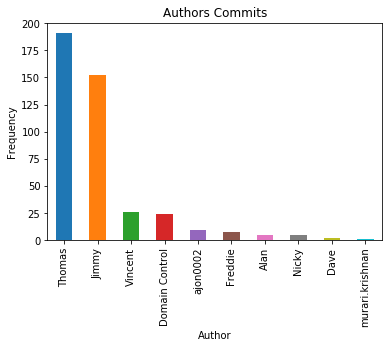

In [14]:
#Author_Count plotted using a bar graph
#Labels for x & y axis and title of graph created
Author_Count.plot(kind='bar')
plt.title("Authors Commits")
plt.xlabel("Author")
plt.ylabel("Frequency")

In [15]:
#Changed the format of the Date column to datetime
dframe.Date = pd.to_datetime(dframe.Date)

#New column in dframe created. This deduces the day of the week for each date
dframe['Day']=dframe.Date.dt.day_name()

#Variable Day created to count the instance of commits on each day
Day = dframe.Day.value_counts()
print(Day)

Thursday     116
Wednesday    101
Friday        99
Tuesday       50
Monday        44
Saturday       7
Sunday         5
Name: Day, dtype: int64


Text(0.5,0,'Frequency')

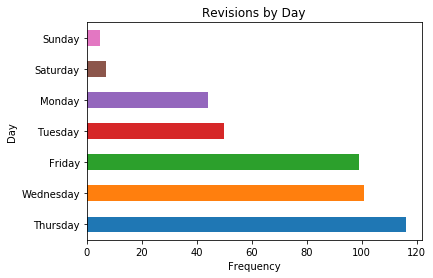

In [16]:
#Day plotted using a horizontal bar graph
#Labels for x & y axis and title of graph created
Day.plot(kind='barh')
plt.title("Revisions by Day")
plt.ylabel("Day")
plt.xlabel("Frequency")

In [30]:
#Breakdown of types of commits by day
dframe.groupby(['Day'])['Total_M','Total_A','Total_D'].sum()

,Total_M,Total_A,Total_D
Day,,,
Friday,299,44,23
Monday,116,115,13
Saturday,22,1,0
Sunday,27,0,0
Thursday,341,391,558
Tuesday,146,456,34
Wednesday,235,49,139


In [29]:
#New columns for hours created in dframe. This takes the hour information from the time column
dframe.Hours = dframe.Time.map( lambda x: pd.to_datetime(x).hour )

#Hour variable created to count commits for each hour
Hour = dframe.Hours.value_counts()
Hour.sort_values()

19     1
5      1
18     2
7      2
20     3
6      3
17     4
8     12
10    30
12    31
9     33
16    39
15    52
13    56
11    57
14    96
Name: Time, dtype: int64

Text(0.5,0,'Hour (24hr clock)')

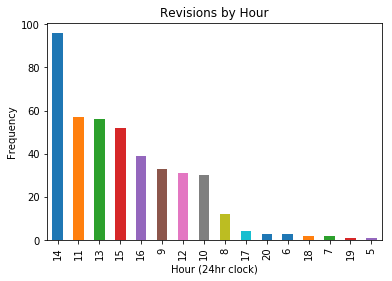

In [28]:
#Day plotted using a bar graph 
#Labels for x & y axis and title of graph created
Hour.plot(kind='bar')
plt.title("Revisions by Hour")
plt.ylabel("Frequency")
plt.xlabel("Hour (24hr clock)")

Text(0.5,0,'Hour (24hr clock)')

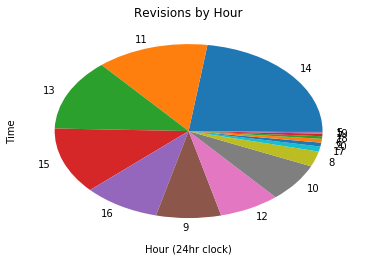

In [27]:
#Day plotted using a pie chart - harder to read than bar graph
#Label for data and title of graph created
Hour.plot(kind='pie')
plt.title("Revisions by Hour")
plt.xlabel("Hour (24hr clock)")